#### <u>Simple Moving Averages</u>

- Helps describe some trends in a time series.
- Depends on window size
- Larger window size (such as 12-month windows) ~ general trend
- Shorter window size: Helps get the detailed behaviour such as seasonality


![Example of SMA](image-1.png)

#### <u>Exponentially Weighted Moving Average : An expansion of the idea of Simple Moving Averages</u>

#### <u>Drawbacks of SMA:</u>
- The model is constrained to the same window size selected once for the entire dataset.
-  Smaller windows lead to more noise.
- Rarely fills the peaks and valleys of seasonal data
- Doesn't actually inform much of the future behaviour of the data
- Extreme historical value can skew data significantly

#### <u> EWMA </u>
- Intuitive observation: Recent data is more reflective of the future vis-a-vis past data.
- Way to emphasise on recent data? To weight it as more important vs more older data. This is done using an EWMA vs a normal SMA
- Amount of weight applied to recent values depend on the actual parameters used in the EWMA
- Weights applied also depend on no. of periods, given a window size


![EWMA Plot](image-2.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
airline = pd.read_csv('airline.csv', index_col='Month')
airline.dropna(inplace=True)

In [4]:
airline.index = pd.to_datetime(airline.index)

In [5]:
airline['6-month-sma'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-sma'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

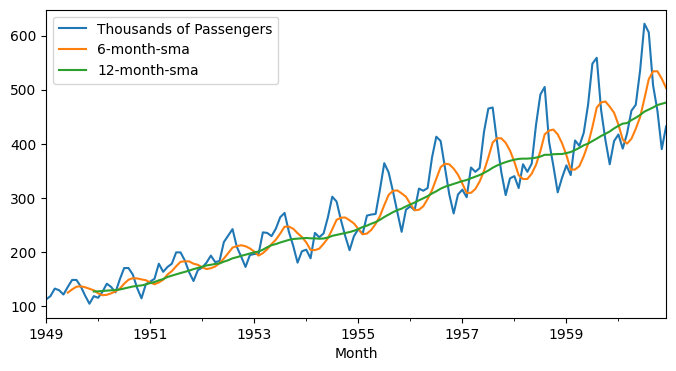

In [6]:
airline.plot(figsize=(8, 4))

In [7]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

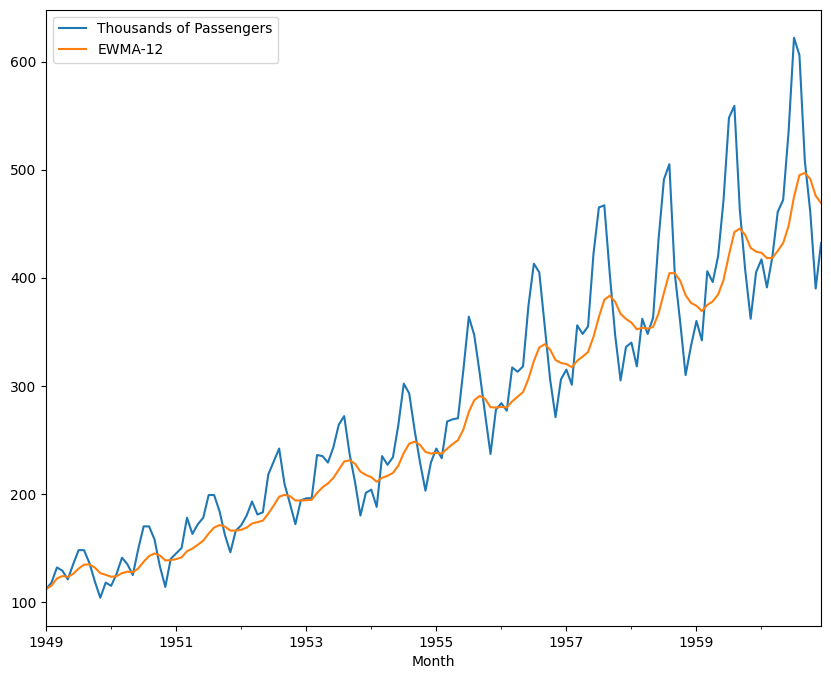

In [8]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10, 8))

In [9]:
airline['EWMA-12-adjust'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()

<AxesSubplot:xlabel='Month'>

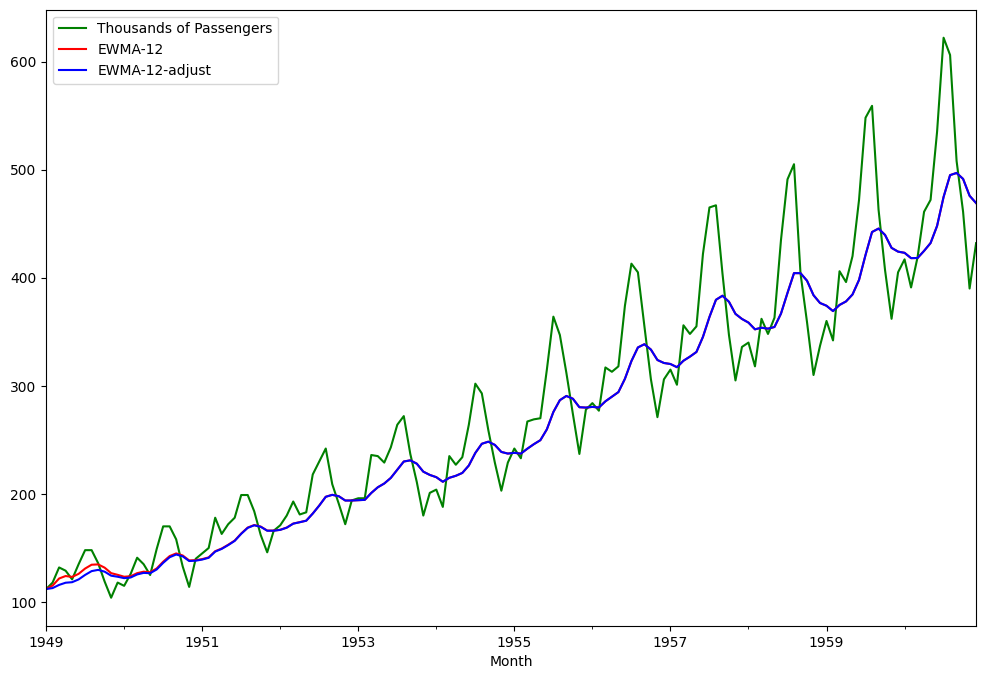

In [31]:
airline[['Thousands of Passengers', 'EWMA-12', 'EWMA-12-adjust']].plot(figsize=(12, 8), style=['green', 'red', 'blue'])

<AxesSubplot:xlabel='Month'>

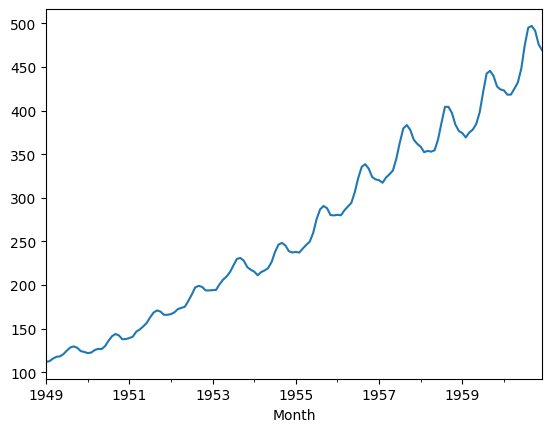

In [32]:
airline['EWMA-12-adjust'].plot()

<AxesSubplot:xlabel='Month'>

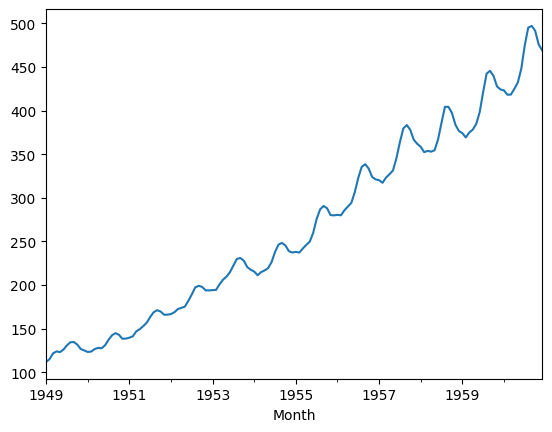

In [33]:
airline['EWMA-12'].plot()

#### Math

For adjust = False:-
$y_t = (1-\alpha)y_{t-1}+\alpha x_t$

#### Terms related to EWM and choosing alpha

- Span
- Centre of Mass (CoM)
- Half Life


$f(x) = \begin{cases}
  \frac{2}{s+1} & \text{for } s\geq1 \\\\
  \frac{1}{1+c} & \text{for } c \geq 0\\\\
  1-e^{\frac{log(0.5)}{h}}
\end{cases}
$

- Span: An n-<strong>day</strong> exponentially weighted moving average
- Centre of Mass = c = $\frac{s-1}{2}$
- Half Life: Time for the exponential moving average to reduce to one half